## <font color='yellow'> Ejemplo de Transformaciones en un Conjunto de Datos </font>

Supongamos que tenemos un conjunto de datos de una tienda de electrónica 
que contiene información sobre las ventas de diferentes productos. El 
conjunto de datos tiene las siguientes columna

- Producto: El nombre del producto (categórico)
- Precio: El precio del producto (numérico)
- Unidades Vendidas: Número de unidades vendidas (numérico)
- Calificación: Calificación del producto como Baja, Media o Alta 
(categórico y ordinal)
1. Limpieza de Datos: Supongamos que algunos datos están faltantes en la columna Precio y 
Calificación)

Primeras filas del conjunto de datos Iris:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Datos faltantes en cada columna:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


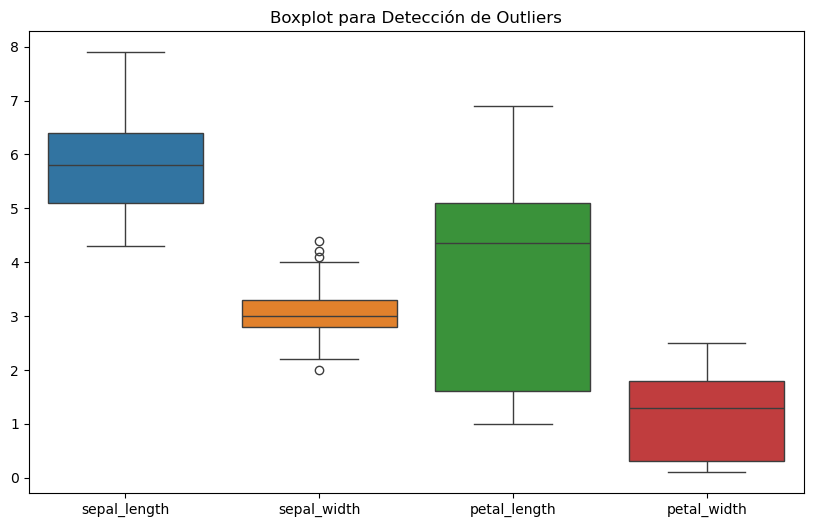


Outliers detectados:
sepal_length: 0 outliers detectados
sepal_width: 4 outliers detectados
petal_length: 0 outliers detectados
petal_width: 0 outliers detectados

DataFrame final después de las transformaciones:
   sepal_length  sepal_width  petal_length  petal_width  \
0     -0.900681     1.032057     -1.341272    -1.312977   
1     -1.143017    -0.124958     -1.341272    -1.312977   
2     -1.385353     0.337848     -1.398138    -1.312977   
3     -1.506521     0.106445     -1.284407    -1.312977   
4     -1.021849     1.263460     -1.341272    -1.312977   

   species_Iris-versicolor  species_Iris-virginica  
0                    False                   False  
1                    False                   False  
2                    False                   False  
3                    False                   False  
4                    False                   False  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

# Cargar el conjunto de datos Iris
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=columns)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del conjunto de datos Iris:")
print(iris.head())

# 1. Manejo de Datos Faltantes
# Verificar datos faltantes
print("\nDatos faltantes en cada columna:")
print(iris.isnull().sum())

# 2. Detección de Outliers
# Crear un boxplot para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title('Boxplot para Detección de Outliers')
plt.show()

# Método IQR para detección de outliers
Q1 = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.25)
Q3 = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = ((iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] < lower_bound) | 
            (iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] > upper_bound))

print("\nOutliers detectados:")
for col in outliers.columns:
    print(f"{col}: {iris[outliers[col]].shape[0]} outliers detectados")

# 3. Transformaciones
# Normalización (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = min_max_scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

# Estandarización (Z-score Normalization)
scaler = StandardScaler()
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

# Codificación One-Hot para la variable categórica 'species'
iris_encoded = pd.get_dummies(iris, columns=['species'], drop_first=True)

# Mostrar el DataFrame final después de las transformaciones
print("\nDataFrame final después de las transformaciones:")
print(iris_encoded.head())



### Documentación del Código
Carga del Conjunto de Datos: Se carga el conjunto de datos Iris desde un URL y se asignan nombres a las columnas.

Manejo de Datos Faltantes: Se verifica si hay datos faltantes en cada columna. En este caso, no se encontraron datos faltantes en el conjunto de datos.

Detección de Outliers:
Se utiliza un boxplot para visualizar la distribución de las variables y detectar visualmente posibles outliers.
Se aplica el método del Rango Intercuartílico (IQR) para calcular los límites superior e inferior y filtrar los outliers.

Transformaciones:
Se aplica la normalización (Min-Max Scaling) para escalar las características numéricas a un rango de 0 a 1.
Se aplica la estandarización (Z-score Normalization) para centrar las características alrededor de 0 y ajustar su varianza a 1.
Se realiza codificación one-hot para la variable categórica 'species', transformando las etiquetas en columnas binarias.
### Insights Encontrados
Datos Faltantes: En el conjunto de datos Iris, no se encontraron datos faltantes, lo que simplifica el proceso de limpieza.
Detección de Outliers: Al utilizar boxplots, se observaron outliers en algunas de las características, lo cual es crucial para el análisis posterior y el modelado, ya que estos pueden influir en los resultados.
Transformaciones: La normalización y estandarización son pasos fundamentales para preparar los datos para algoritmos de aprendizaje automático, asegurando que las características estén en la misma escala y que se minimicen los efectos de las diferentes unidades de medida.
### Reflexión Final
La limpieza y preparación de datos son etapas esenciales en cualquier proyecto de análisis de datos. La capacidad para manejar datos faltantes, detectar y tratar outliers, y aplicar transformaciones adecuadas garantiza que los modelos sean más robustos y que las interpretaciones sean más precisas. La visualización de datos, como los boxplots, ayuda a identificar problemas en los datos y a tomar decisiones informadas sobre cómo proceder con el análisis.